# **Paddy Disease Classification using Deep Learning Neural Networks**

# Importing Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px

# Loading the Dataset

In [74]:
df_original_train = pd.read_csv("./Rice_Data/train.csv")
df_original_train.head()

image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

In [75]:
# Getting the info of our dataset.
df_original_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


In [76]:
# Getting the Shape of the Dataset.
print(f"The dataset contains the {df_original_train.shape[0]} rows and {df_original_train.shape[1]} columns.")

The dataset contains the 10407 rows and 4 columns.


# **Let's do Some Exploratory Data Analysis (EDA)**

In [77]:
df_original_train['image_id'].head()

0    100330.jpg
1    100365.jpg
2    100382.jpg
3    100632.jpg
4    101918.jpg
Name: image_id, dtype: object

In [78]:
# Look at label column.
df_original_train['label'].head()

0    bacterial_leaf_blight
1    bacterial_leaf_blight
2    bacterial_leaf_blight
3    bacterial_leaf_blight
4    bacterial_leaf_blight
Name: label, dtype: object

In [79]:
# Let's check the unique labels in the dataset.
df_original_train['label'].unique() 

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

In [80]:
# Getting value counts of each label in the dataset nummerically.
df_original_train['label'].value_counts()

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

In [81]:
# Let's Dive into the Labels in the dataset.
fig = px.histogram(df_original_train, x='label', title='Distribution of Labels in the Dataset', color_discrete_sequence=['#636EFA'])
fig.update_layout(xaxis_title='Labels', yaxis_title='Count', bargap=0.2)
fig.show()

In [82]:
# Check is there any missing values in the dataset.
df_original_train.isnull().sum()

image_id    0
label       0
variety     0
age         0
dtype: int64

In [83]:
# Check unique values in the varietycolumn.
df_original_train['variety'].value_counts()

variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

In [84]:
# Let's Dive into the Labels in the dataset.
fig = px.histogram(df_original_train, x='variety', title='Distribution of Variety in the Dataset', color_discrete_sequence=["#63FAB8"])
fig.update_layout(xaxis_title='Variety', yaxis_title='Count', bargap=0.2)
fig.show()

In [85]:
import plotly.graph_objects as go
import plotly.express as px

# =========================================================
# STEP 1: Dataset ko Group Karna (Class & Variety Counts)
# =========================================================
counts = df_original_train.groupby(['label', 'variety']).size().reset_index(name='count')

# Har class ke total count nikaalna
class_totals = counts.groupby('label')['count'].transform('sum')

# Har variety ka percentage nikalna (apne class ke andar)
counts['percentage'] = (counts['count'] / class_totals * 100).round(2)

# =========================================================
# STEP 2: TREEMAP VISUALIZATION (Counts + %)
# =========================================================
treemap_fig = px.treemap(
    counts,
    path=["label", "variety"],  # Hierarchy: Class -> Variety
    values="count",
    title="🌱 Classes and Their Varieties (Treemap Overview)",
    color="label",
    hover_data={"count": True, "percentage": True}  # Hover me count + % dikhayega
)
treemap_fig.show()

# =========================================================
# STEP 3: DROPDOWN INTERACTIVE BAR CHART (Counts + %)
# =========================================================
classes = counts["label"].unique().tolist()
bar_traces = []

for cls in classes:
    sub = counts[counts["label"] == cls]

    # Bar chart me hovertext: count + percentage
    trace = go.Bar(
        x=sub["variety"],
        y=sub["count"],
        name=cls,
        text=[f"{c} ({p}%)" for c, p in zip(sub["count"], sub["percentage"])],
        textposition="auto",  # Bars ke upar text bhi show hoga
        hovertemplate="<b>Variety:</b> %{x}<br>" +
                      "<b>Count:</b> %{y}<br>" +
                      "<b>Percentage:</b> %{text}<extra></extra>",
        visible=False
    )
    bar_traces.append(trace)

# Default: Pehli class visible rakho
bar_traces[0].visible = True

# =========================================================
# STEP 4: DROPDOWN MENU CONFIGURATION
# =========================================================
updatemenus = [
    dict(
        active=0,
        buttons=[
            dict(
                label=cls,
                method="update",
                args=[
                    {"visible": [c == cls for c in classes]},
                    {"title": f"🌿 Varieties for Class: {cls} (Counts + %)"}
                ]
            )
            for cls in classes
        ],
        x=0.0,
        y=1.15,
        xanchor="left",
        yanchor="top"
    )
]

# =========================================================
# STEP 5: LAYOUT SETTINGS (Bar Chart)
# =========================================================
bar_layout = go.Layout(
    title=f"🌿 Varieties for Class: {classes[0]} (Counts + %)",
    updatemenus=updatemenus,
    xaxis_title="Variety",
    yaxis_title="Count",
)

# =========================================================
# STEP 6: FINAL BAR CHART PLOT
# =========================================================
bar_fig = go.Figure(data=bar_traces, layout=bar_layout)
bar_fig.show()


In [86]:
# Let's have a glance at age column.
df_original_train['age'].head()

0    45
1    45
2    45
3    45
4    45
Name: age, dtype: int64

In [87]:
# Getting the statisitcal summary of age column.
df_original_train['age'].describe()


count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

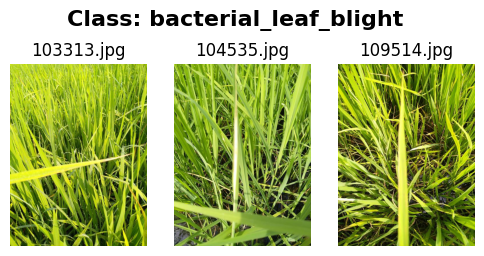

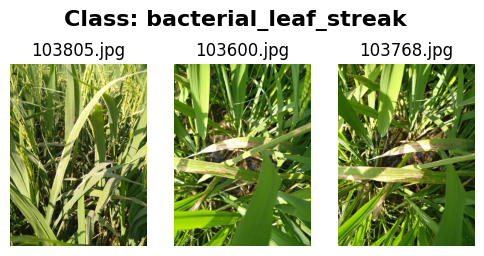

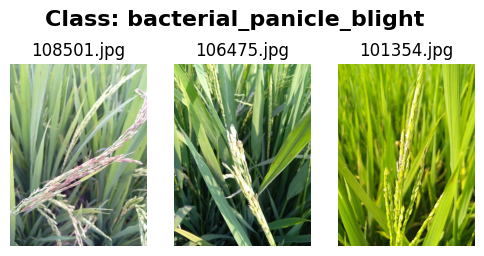

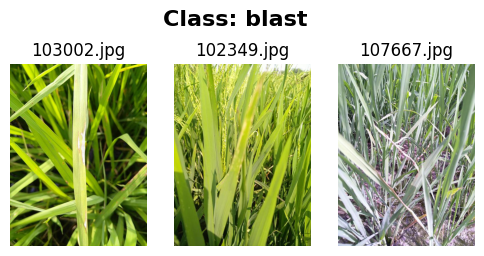

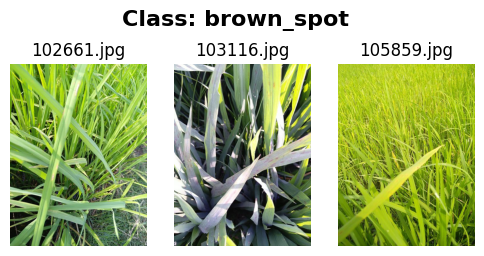

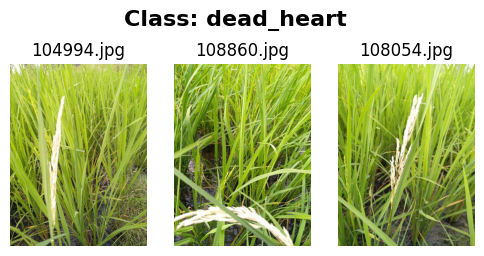

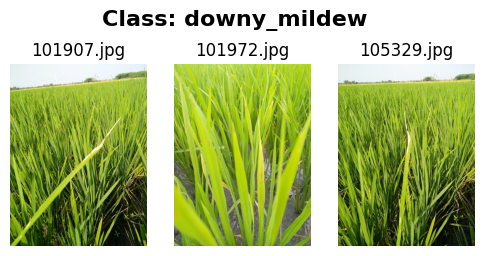

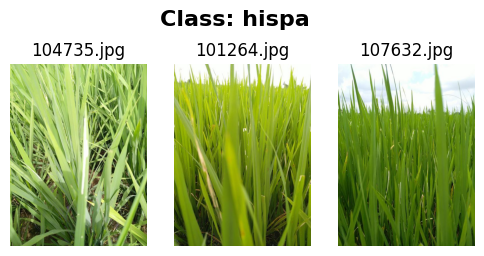

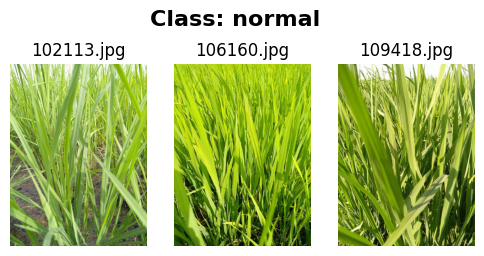

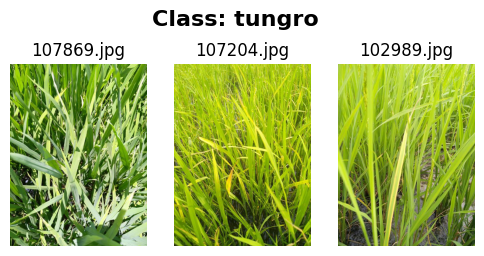

In [88]:
# Displaying 3 Sample Images from each class.

import matplotlib.pyplot as plt
import os

# Base directory jaha class folders hain
base_dir = r"C:/Users/Lenovo/Alyz.Code/Deep Learning/Rice_Data/train_images/"

# Har class ke liye 3 images show karna
classes = df_original_train['label'].unique()
n_images = 3  

for cls in classes:
    sample_images = df_original_train[df_original_train['label'] == cls].sample(n_images, random_state=42)

    plt.figure(figsize=(6, 3))
    plt.suptitle(f"Class: {cls}", fontsize=16, fontweight="bold")

    for i, row in enumerate(sample_images.itertuples()):
        # Har image ka full path: base_dir/class_name/image_id
        img_path = os.path.join(base_dir, row.label, row.image_id)

        if not os.path.exists(img_path):
            print(f"⚠️ File not found: {img_path}")
            continue

        img = plt.imread(img_path)
        plt.subplot(1, n_images, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(row.image_id)

    plt.show()


In [89]:
# Har (class, variety) ka count nikalna
counts = df_original_train.groupby(['label', 'variety']).size().reset_index(name='count')

# Har class ke liye max count wali variety select karna
most_affected = counts.loc[counts.groupby("label")["count"].idxmax()]

print("Most affected variety in each class:")
print(most_affected)


Most affected variety in each class:
                       label variety  count
0      bacterial_leaf_blight   ADT45    406
10     bacterial_leaf_streak   Zonal    169
11  bacterial_panicle_blight   ADT45    260
14                     blast   ADT45    793
23                brown_spot   ADT45    835
27                dead_heart   ADT45    979
35              downy_mildew   ADT45    331
42                     hispa   ADT45    833
49                    normal   ADT45   1457
53                    tungro   ADT45    991


In [90]:
import plotly.express as px

fig = px.bar(
    most_affected,
    x="label",
    y="count",
    color="variety",
    text="variety",
    title="Most Affected Variety in Each Class",
    labels={"count": "Number of Images", "label": "Disease Class"}
)

fig.update_traces(textposition="outside")
fig.show()


# **Going to Model Building**

In [91]:
# Encode the Categorical Features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_original_train['label'] = le.fit_transform(df_original_train['label'])
df_original_train['variety'] = le.fit_transform(df_original_train['variety'])
# Look at the encoded dataframe.
df_original_train.head()

image_id  label  variety  age
0  100330.jpg      0        0   45
1  100365.jpg      0        0   45
2  100382.jpg      0        0   45
3  100632.jpg      0        0   45
4  101918.jpg      0        0   45

In [92]:
# Write TensorFlow code to load images from a directory using image_dataset_from_directory. 
# The dataset should be split into training and validation with validation_split=0.2, 
# use a fixed random seed for reproducibility, resize images to (img_height, img_width), 
# and load them in batches of size batch_size.
img_height, img_width = 224, 224
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=r"C:/Users/Lenovo/Alyz.Code/Deep Learning/Rice_Data/train_images/",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=r"C:/Users/Lenovo/Alyz.Code/Deep Learning/Rice_Data/train_images/",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.
Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [93]:
# Check the shape of the images and labels in one batch from the training dataset.
for image_batch, labels_batch in train_ds:
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)

    # Extra info / interpretation
    print(f"\n🔎 Info Gain:")
    print(f"- Total images in this batch: {image_batch.shape[0]}")
    print(f"- Each image shape (Height x Width x Channels): {image_batch.shape[1:]}")
    print(f"- Number of labels in this batch: {labels_batch.shape[0]}")
    print(f"- Example labels: {labels_batch.numpy()[:10]}")  # show few labels
    break


Image batch shape: (32, 224, 224, 3)
Labels batch shape: (32,)

🔎 Info Gain:
- Total images in this batch: 32
- Each image shape (Height x Width x Channels): (224, 224, 3)
- Number of labels in this batch: 32
- Example labels: [3 5 5 8 7 6 3 8 8 9]


In [94]:
# Let's Normalize the pixel values to be between 0 and 1.
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
image_batch.shape


TensorShape([32, 224, 224, 3])

In [95]:
# Showing the pixel values of the first image in the batch before and after normalization.
first_image = image_batch[0]
print("Pixel values of the first image after normalization:")
print(first_image.numpy())
print("\n🔎 Info Gain:"
      "\n- Pixel values are now between 0 and 1 instead of 0 to 255."
      "\n- This helps the model train faster and perform better.")

Pixel values of the first image after normalization:
[[[5.97759128e-01 8.01680744e-01 0.00000000e+00]
  [5.89355826e-01 7.93277383e-01 0.00000000e+00]
  [5.80952406e-01 7.80952394e-01 0.00000000e+00]
  ...
  [7.59423733e-01 8.65626276e-01 5.47939122e-01]
  [8.65226388e-01 9.83033359e-01 6.56622946e-01]
  [6.84834719e-01 8.34974647e-01 4.65226859e-01]]

 [[6.01320565e-01 8.05242121e-01 0.00000000e+00]
  [5.93277395e-01 7.97198951e-01 0.00000000e+00]
  [5.84873974e-01 7.84873962e-01 0.00000000e+00]
  ...
  [8.62945139e-01 9.54261601e-01 7.41336405e-01]
  [8.83273959e-01 9.82753575e-01 7.36055315e-01]
  [7.28811920e-01 8.76710892e-01 5.09364367e-01]]

 [[6.05002046e-01 8.08923602e-01 0.00000000e+00]
  [5.97198963e-01 8.01120520e-01 0.00000000e+00]
  [5.88795543e-01 7.88795531e-01 5.60225744e-04]
  ...
  [9.42657471e-01 9.87715423e-01 8.79272103e-01]
  [7.89515674e-01 8.84353399e-01 6.74030066e-01]
  [7.27732539e-01 8.82074058e-01 4.80394065e-01]]

 ...

 [[1.07963234e-01 1.68747410e-01 1.

In [96]:
# Getting the number of classes.
num_classes = len(train_ds.class_names)
print(f"Number of classes: {num_classes}")

Number of classes: 10


In [97]:
# Building the CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7

In [98]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Making the history variable to store the training history.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)
# Plotting training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)




Epoch 1/10
261/261 [==============================] - 132s 467ms/step - loss: 2.0498 - accuracy: 0.2831 - val_loss: 1.6524 - val_accuracy: 0.4536
Epoch 2/10
261/261 [==============================] - 43s 163ms/step - loss: 1.3235 - accuracy: 0.5667 - val_loss: 1.0866 - val_accuracy: 0.6353
Epoch 3/10
261/261 [==============================] - 36s 137ms/step - loss: 0.6943 - accuracy: 0.7791 - val_loss: 0.9766 - val_accuracy: 0.7117
Epoch 4/10
261/261 [==============================] - 48s 182ms/step - loss: 0.2971 - accuracy: 0.9088 - val_loss: 1.0543 - val_accuracy: 0.7525
Epoch 5/10
261/261 [==============================] - 55s 206ms/step - loss: 0.1313 - accuracy: 0.9611 - val_loss: 1.0856 - val_accuracy: 0.7814
Epoch 6/10
261/261 [==============================] - 37s 141ms/step - loss: 0.0832 - accuracy: 0.9762 - val_loss: 1.2452 - val_accuracy: 0.7785
Epoch 7/10
261/261 [==============================] - 42s 159ms/step - loss: 0.0609 - accuracy: 0.9809 - val_loss: 1.2672 - val_a

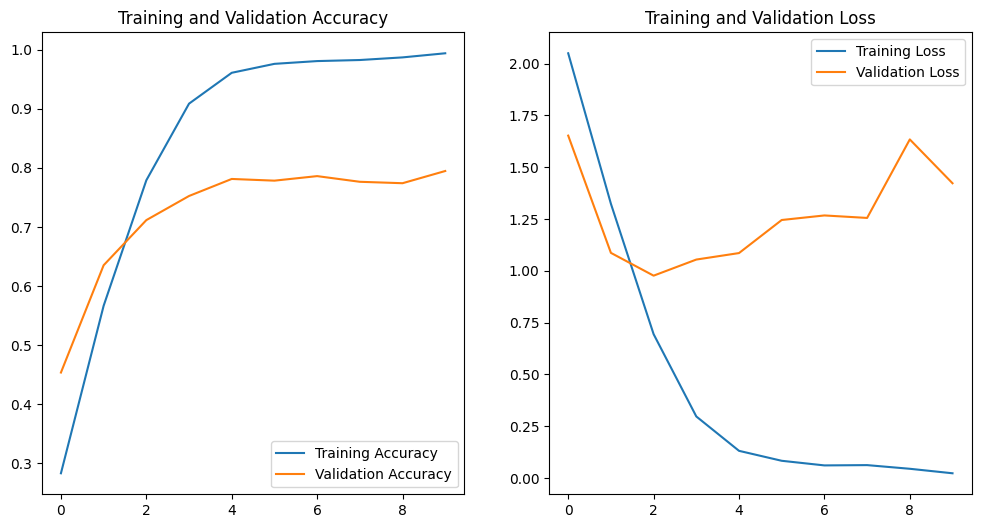

In [99]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 33ms/step


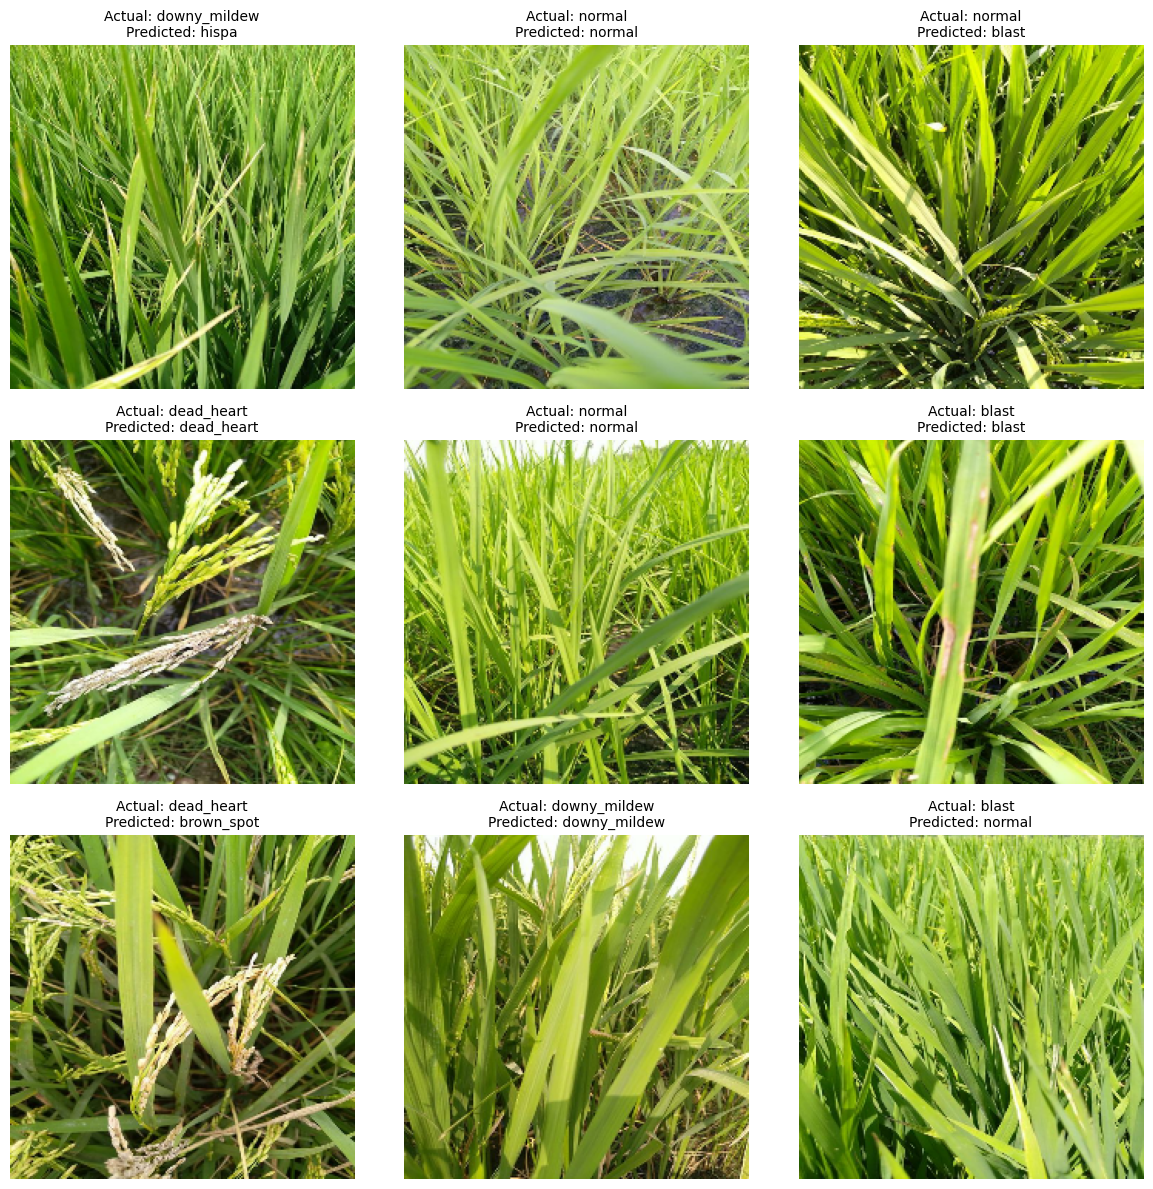

In [101]:
import numpy as np
import matplotlib.pyplot as plt

class_names = train_ds.class_names

# Take one batch from validation dataset
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Setup figure: 3 rows × 3 cols
    plt.figure(figsize=(12, 12))

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(
            f"Actual: {class_names[labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}",
            fontsize=10
        )
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# **Observations**
- The dataset contains 4 columns: `image_id`, `label`, `variety` and `age`.
- The `image_id` column contains the names of the images.
- The `label` column contains the disease labels.
- The `variety` column contains the variety of the paddy.
- The `age` column contains the age of the paddy in days.
- There are a total of 10,407 images and 4 features in the training dataset.
- There are 10 unique classes/labels in the dataset.
- The most common label is `normal` and the least common label is `bacterial_panicle_blight` in the training dataset.
- There is no any missing values in the training dataset.
- There are 10 unique varities in the dataset.
- The most common variety is `AdT45` and the least common variety is `Surya` in the training dataset.
- The most affected variety in each class is as follows:
  - Bacterial Leaf Blight: `AdT45`
  - Bacterial Panicle Blight: `AdT45`
  - Blast: `AdT45`
  - Brown Spot: `AdT45`
  - Dead Heart: `AdT45`
  - Downy Mildew: `AdT45`
  - Hispa: `AdT45`
  - Normal: `AdT45`
  - Tungro: `AdT45`
  - Bacterial Leaf Streak: `Zonal`
- The age of the paddy ranges from `45` to `82` days with a mean age of `64` days.
- Total number of images in the training dataset is `10,407`.
- Using `8326` images for training and `2081` images for validation.

